In [1]:
import os
os.chdir('../../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ai import cs

from databases.joint_sets import MuPoTSJoints
from util.misc import load

In [3]:
p = load('../models/21a1850a239642e4978f2cfa0756803f/test_results.pkl')

In [4]:
mask = p['pred'][:, 14, 0] != 0

In [5]:
gt = p['pose3d'][mask]
pred = p['pred'][mask]
vid_id = np.array([a for a, b in p['index']])[mask]

In [ ]:
i = vid_id[0]

In [ ]:
mi = np.argmax(d)
mpred[mi, 14, ], mgt[mi, 14, ]

In [6]:
def get_cjs():
    connected_joints = MuPoTSJoints().LIMBGRAPH
    return np.array(connected_joints)

def get_rtp(nd):
    cj = get_cjs()
    diff = nd[:, cj[:, 0], :] - nd[:, cj[:, 1], :]
    r, t, p = cs.cart2sp(diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])
    return r, t, p

def get_lengths(nd):
    r, _, _ = get_rtp(nd)
    return r

In [7]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    break
#     d = get_lengths(mgt) - get_lengths(mpred)
#     d = np.square(d)
#     d = np.sum(d, axis=1)
#     d = np.sqrt(d)
#     d = np.sort(d)
#     plt.plot(d)
#     plt.show()
#     print(np.sum(d < 1e-3))

In [26]:
from util.viz import *
from training.torch_tools import *

import torch

In [9]:
cj = get_cjs()

In [10]:
mgt[:1, ].shape

(1, 17, 3)

In [28]:
eval_results(torch.tensor(mgt[:1, ]).cuda(), torch.tensor(mpred[:1, ]).cuda(), MuPoTSJoints())

RuntimeError: Could not run 'aten::values' with arguments from the 'CUDATensorId' backend. 'aten::values' is only available for these backends: [SparseCPUTensorId, VariableTensorId, SparseCUDATensorId].

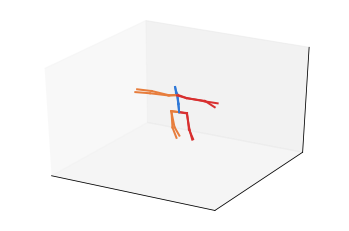

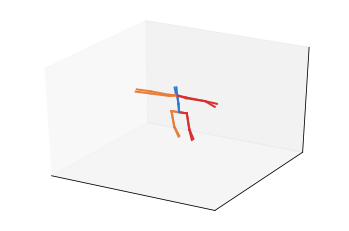

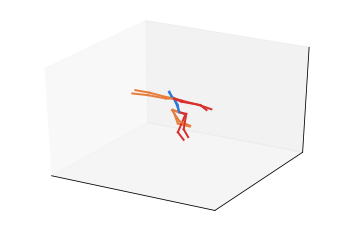

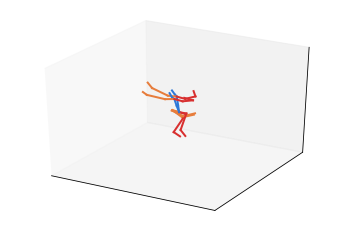

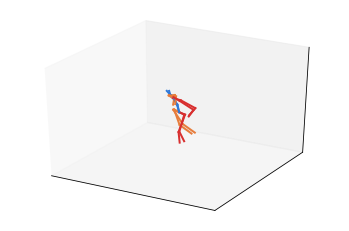

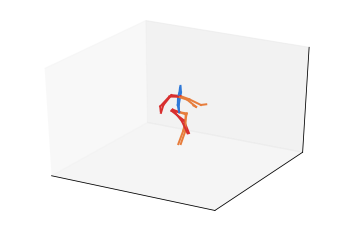

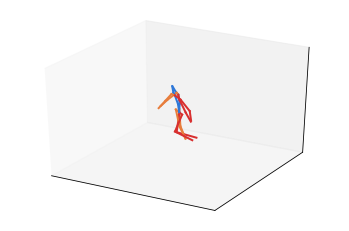

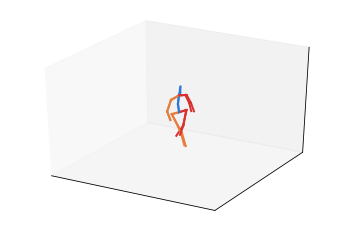

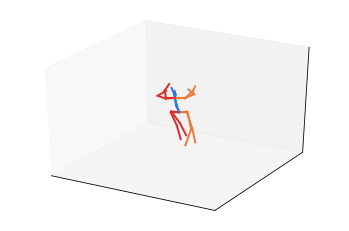

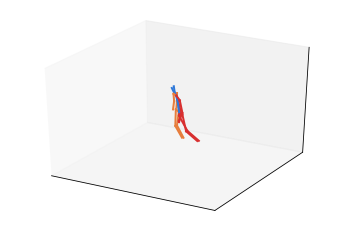

In [22]:
for i in range(0, 100, 10):
    show3Dpose(np.array([mgt[i, ], mpred[i, ]]), MuPoTSJoints(), invert_vertical=True)
    plt.show()

In [ ]:
r, t, p = get_rtp(mgt)
t

In [ ]:
r, t, p = get_rtp(mpred)
t

In [ ]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    d = get_lengths(mgt) - get_lengths(mpred)
    d = np.square(d)
    d = np.sum(d, axis=1)
    d = np.sqrt(d)
    d = np.sort(d)
    plt.plot(d)
    plt.show()
    print(np.sum(d < 1e-3))

In [ ]:
np.mean(get_lengths(mgt) - get_lengths(mpred))

In [ ]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    d = mgt[:, 14, :] - mpred[:, 14, :]
    d = np.square(d)
    d = np.sum(d, axis=1)
    d = np.sqrt(d)
    d = np.sort(d)
    plt.plot(d)
    plt.show()
    print(np.sum(d < 1e-3))

In [ ]:
d = gt[:, 14, :] - pred[:, 14, :]

In [ ]:
plt.plot(np.sort(np.sum(d, axis=1)))

In [ ]:
correct_i = np.arange(len(d))[np.sum(d, axis=1) < 1e-6]

In [ ]:
len(correct_i)

In [ ]:
dist = correct_i[:-1] - correct_i[1:]

In [ ]:
unique, counts = np.unique(dist, return_counts=True)

In [ ]:
{u: c for u, c in zip(unique, counts)}

In [ ]:
[c for u, c in zip(*(np.unique([a for a, b in p['index']], return_counts=True)))]